<a href="https://colab.research.google.com/github/KPrathiksha2000/KDD_Network_Intrusion_Detection/blob/main/KDD_NID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import urllib.request
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [89]:
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
with urllib.request.urlopen(url) as response:
    with gzip.GzipFile(fileobj=response) as uncompressed:
        df = pd.read_csv(uncompressed, header=None)

In [90]:
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
              'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
              'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
              'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
              'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
              'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
              'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
              'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']

In [91]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [92]:
df_original=df

In [93]:
df.shape

(494021, 42)

In [94]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
set(df['outcome'].values)

{'back.',
 'buffer_overflow.',
 'ftp_write.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'loadmodule.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'rootkit.',
 'satan.',
 'smurf.',
 'spy.',
 'teardrop.',
 'warezclient.',
 'warezmaster.'}

In [96]:
df.isnull().values.any()

np.False_

In [97]:
df.duplicated().any()

np.True_

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.shape

(145586, 42)

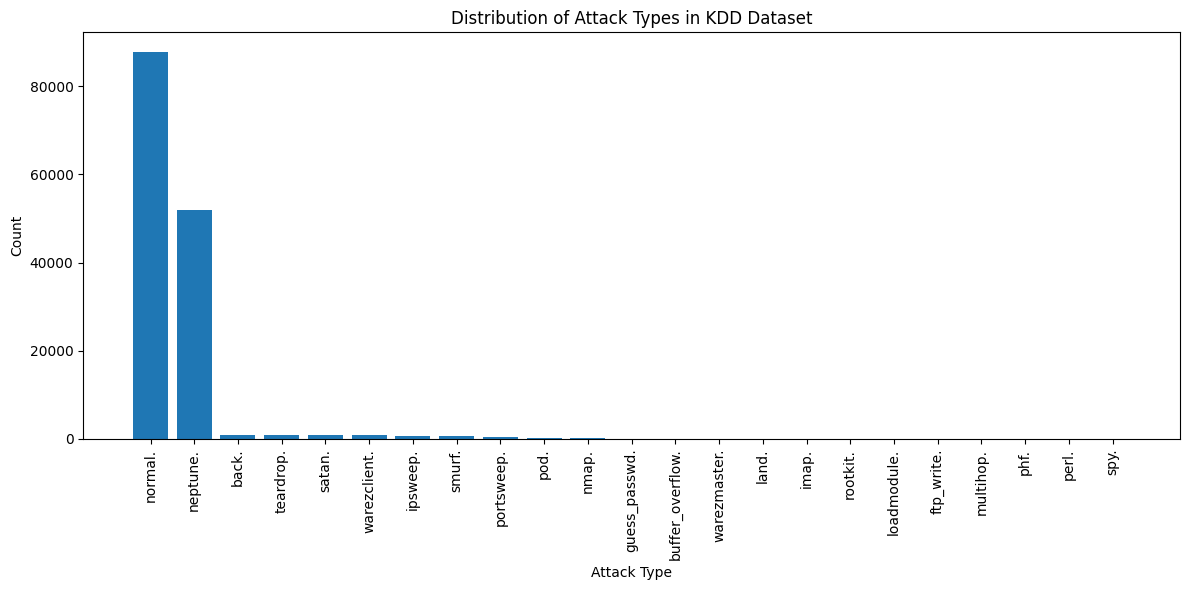

In [100]:
outcome_counts = df['outcome'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Distribution of Attack Types in KDD Dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [101]:
attack_percentages = df['outcome'].value_counts(normalize=True) * 100
print(attack_percentages)

outcome
normal.             60.329977
neptune.            35.594082
back.                0.664899
teardrop.            0.630555
satan.               0.622313
warezclient.         0.613383
ipsweep.             0.447158
smurf.               0.440290
portsweep.           0.285742
pod.                 0.141497
nmap.                0.108527
guess_passwd.        0.036405
buffer_overflow.     0.020606
warezmaster.         0.013738
land.                0.013051
imap.                0.008243
rootkit.             0.006869
loadmodule.          0.006182
ftp_write.           0.005495
multihop.            0.004808
phf.                 0.002748
perl.                0.002061
spy.                 0.001374
Name: proportion, dtype: float64


In [102]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [103]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['protocol_type', 'service', 'flag', 'outcome']


In [104]:
for col in categorical_features:
    print(f"\n{col} - Unique values:")
    print(df[col].unique())


protocol_type - Unique values:
['tcp' 'udp' 'icmp']

service - Unique values:
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']

flag - Unique values:
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']

outcome - Unique values:
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'war

In [105]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols


['land', 'logged_in', 'root_shell', 'is_guest_login']

In [106]:
single_cols = [col for col in df.columns if df[col].nunique() == 1]
single_cols

['num_outbound_cmds', 'is_host_login']

In [107]:
# Compute correlation matrix (only for numeric features)
corr_matrix = df.corr(numeric_only=True).abs()
corr_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004280,0.002582,0.001264,0.009102,0.003707,0.009855,0.004343,0.090667,0.061454,...,0.062703,0.116824,0.120372,0.429391,0.353500,0.028847,0.067714,0.067908,0.003710,0.002456
src_bytes,0.004280,1.000000,0.000162,0.000051,0.000365,0.000018,0.003999,0.000077,0.000928,0.000025,...,0.000117,0.003937,0.002144,0.000138,0.005619,0.000760,0.001742,0.001111,0.001092,0.001327
dst_bytes,0.002582,0.000162,1.000000,0.000551,0.003969,0.016147,0.000658,0.048789,0.028106,0.022755,...,0.034975,0.013327,0.031658,0.016820,0.028689,0.001728,0.028956,0.028726,0.014865,0.015282
land,0.001264,0.000051,0.000551,1.000000,0.000989,0.000056,0.000823,0.000211,0.011524,0.000093,...,0.021110,0.012802,0.007972,0.002662,0.037464,0.106807,0.015462,0.008634,0.003981,0.004149
wrong_fragment,0.009102,0.000365,0.003969,0.000989,1.000000,0.000400,0.005925,0.001521,0.082969,0.000667,...,0.039512,0.051512,0.051003,0.085303,0.064637,0.009676,0.049449,0.054156,0.029722,0.029870
urgent,0.003707,0.000018,0.016147,0.000056,0.000400,1.000000,0.000142,0.141954,0.004818,0.014268,...,0.006155,0.005306,0.003356,0.013441,0.002639,0.001494,0.003053,0.003040,0.001709,0.001677
hot,0.009855,0.003999,0.000658,0.000823,0.005925,0.000142,1.000000,0.007997,0.070770,0.003533,...,0.001460,0.037461,0.024315,0.010235,0.018591,0.018850,0.043728,0.044732,0.020471,0.021826
num_failed_logins,0.004343,0.000077,0.048789,0.000211,0.001521,0.141954,0.007997,1.000000,0.013872,0.006824,...,0.021350,0.017022,0.008763,0.002344,0.002878,0.016871,0.007588,0.008348,0.031271,0.029892
logged_in,0.090667,0.000928,0.028106,0.011524,0.082969,0.004818,0.070770,0.013872,1.000000,0.008041,...,0.473362,0.759839,0.769697,0.308657,0.095760,0.033620,0.627963,0.627838,0.331083,0.320664
num_compromised,0.061454,0.000025,0.022755,0.000093,0.000667,0.014268,0.003533,0.006824,0.008041,1.000000,...,0.006565,0.005592,0.002194,0.000609,0.001620,0.000536,0.004086,0.003538,0.002371,0.002377


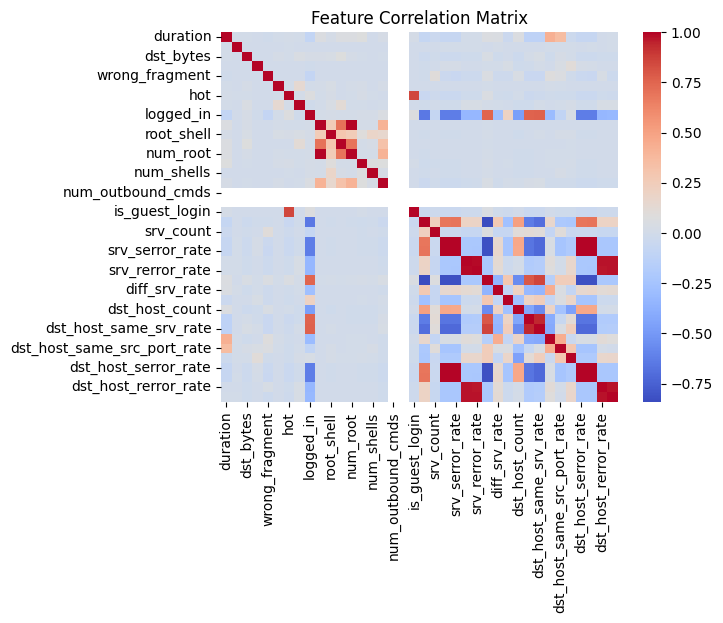

In [108]:
corr = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [109]:
corr_matrix_filled = corr_matrix.fillna(0)

# Select upper triangle matrix without diagonal
upper = corr_matrix_filled.where(np.triu(np.ones(corr_matrix_filled.shape), k=1).astype(bool))

# Threshold for high correlation
threshold = 0.9

# Find pairs with correlation above threshold
high_corr_pairs = []

for col in upper.columns:
    high_corr = upper[col][upper[col] > threshold]
    for row, corr_val in high_corr.items():
        high_corr_pairs.append((row, col, corr_val))

# Print results
print(f"Highly correlated pairs (corr > {threshold}):")
for row, col, val in high_corr_pairs:
    print(f"{row} — {col}: {val:.2f}")


Highly correlated pairs (corr > 0.9):
num_compromised — num_root: 0.99
serror_rate — srv_serror_rate: 1.00
rerror_rate — srv_rerror_rate: 0.99
dst_host_srv_count — dst_host_same_srv_rate: 0.94
serror_rate — dst_host_serror_rate: 1.00
srv_serror_rate — dst_host_serror_rate: 1.00
serror_rate — dst_host_srv_serror_rate: 1.00
srv_serror_rate — dst_host_srv_serror_rate: 1.00
dst_host_serror_rate — dst_host_srv_serror_rate: 1.00
rerror_rate — dst_host_rerror_rate: 0.98
srv_rerror_rate — dst_host_rerror_rate: 0.97
rerror_rate — dst_host_srv_rerror_rate: 0.97
srv_rerror_rate — dst_host_srv_rerror_rate: 0.98
dst_host_rerror_rate — dst_host_srv_rerror_rate: 0.97


In [110]:
cols_to_drop = [
    'num_root',  # drop one from num_compromised and num_root
    'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',  # drop 3 from serror_rate group
    'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',  # drop 3 from rerror_rate group
    'dst_host_srv_count'  # drop one from dst_host_srv_count and dst_host_same_srv_rate
]

df = df.drop(columns=cols_to_drop)

In [111]:
df.shape

(145586, 34)

In [112]:
# 1. Split the data into train and test
train_df, test_df = train_test_split(df_reduced, test_size=0.3, random_state=42)

In [113]:
# 2. Specify categorical columns to encode
categorical_cols = ['protocol_type', 'service', 'flag']

In [114]:
# 3. Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 4. Fit encoder on train categorical columns only
encoder.fit(train_df[categorical_cols])

# 5. Transform train and test categorical columns
train_encoded = encoder.transform(train_df[categorical_cols])
test_encoded = encoder.transform(test_df[categorical_cols])

# 6. Convert encoded arrays to DataFrames with proper column names
encoded_cols = encoder.get_feature_names_out(categorical_cols)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols, index=train_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols, index=test_df.index)

# 7. Drop original categorical columns from train and test
train_df = train_df.drop(columns=categorical_cols)
test_df = test_df.drop(columns=categorical_cols)

# 8. Concatenate encoded columns back to the numeric features
train_final = pd.concat([train_df, train_encoded_df], axis=1)
test_final = pd.concat([test_df, test_encoded_df], axis=1)

In [115]:
train_final.shape

(101910, 111)

In [116]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['land', 'logged_in', 'root_shell', 'is_guest_login']

In [117]:
numerical_cols = ['duration', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate']

# Apply scaling
scaler = StandardScaler()
scaler.fit(train_final[numerical_cols])
train_final[numerical_cols] = scaler.transform(train_final[numerical_cols])


In [118]:
test_final[numerical_cols] = scaler.transform(test_final[numerical_cols])

In [119]:
pd.set_option('display.max_columns', None)
train_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,outcome,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
83046,-0.107909,-0.004642,-0.047472,0,-0.084339,-0.005662,-0.071281,-0.017036,0,-0.008122,-0.020783,-0.008887,-0.020351,-0.017403,-0.051682,0.0,0,0,-0.732127,-0.390251,-0.644222,-0.349731,0.772378,-0.337855,-0.385183,-0.512139,0.980484,-0.417516,3.760723,-0.314717,normal.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16840,-0.107909,-0.004507,0.008158,0,-0.084339,-0.005662,-0.071281,-0.017036,1,-0.008122,-0.020783,-0.008887,-0.020351,-0.017403,-0.051682,0.0,0,0,-0.612566,1.074618,-0.644222,-0.349731,0.772378,-0.337855,-0.219602,-1.330265,0.980484,-0.417516,-0.301775,0.017694,normal.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107979,-0.107909,-0.004636,-0.046788,0,-0.084339,-0.005662,-0.071281,-0.017036,0,-0.008122,-0.020783,-0.008887,-0.020351,-0.017403,-0.051682,0.0,0,0,-0.662383,0.065486,-0.644222,-0.349731,0.772378,-0.337855,0.442720,0.740301,0.827081,-0.349542,-0.343229,-0.314717,normal.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148851,-0.107909,-0.004656,-0.047472,0,-0.084339,-0.005662,-0.071281,-0.017036,0,-0.008122,-0.020783,-0.008887,-0.020351,-0.017403,-0.051682,0.0,0,0,-0.732127,-0.390251,-0.644222,2.894337,0.772378,-0.337855,-0.385183,-1.815081,0.980484,-0.417516,1.688020,4.505239,normal.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348895,-0.107909,-0.004640,-0.047472,0,-0.084339,-0.005662,-0.071281,-0.017036

In [120]:
train_final.shape

(101910, 111)

In [121]:
def map_attack_type(label):
    dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.']
    probe = ['satan.', 'ipsweep.', 'nmap.', 'portsweep.']
    r2l = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.']
    u2r = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.']

    if label == 'normal.':
        return 'normal'
    elif label in dos:
        return 'dos'
    elif label in probe:
        return 'probe'
    elif label in r2l:
        return 'r2l'
    elif label in u2r:
        return 'u2r'
    else:
        return 'unknown'


In [122]:
train_final['outcome'] = train_final['outcome'].apply(map_attack_type)
test_final['outcome'] = test_final['outcome'].apply(map_attack_type)


In [123]:
# Train Random Forest Classifier
X_train = train_final.drop('outcome', axis=1)
y_train = train_final['outcome']
X_test = test_final.drop('outcome', axis=1)
y_test = test_final['outcome']

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [124]:
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))
print("\nRandom Forest Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rf, labels=rf.classes_),
                   index=rf.classes_, columns=rf.classes_))


Random Forest Classification Report:

              precision    recall  f1-score   support

         dos     0.9999    1.0000    1.0000     16306
      normal     0.9992    0.9998    0.9995     26431
       probe     0.9984    0.9908    0.9946       649
         r2l     0.9818    0.9642    0.9729       279
         u2r     1.0000    0.4545    0.6250        11

    accuracy                         0.9994     43676
   macro avg     0.9959    0.8818    0.9184     43676
weighted avg     0.9994    0.9994    0.9993     43676


Random Forest Confusion Matrix:
          dos  normal  probe  r2l  u2r
dos     16306       0      0    0    0
normal      0   26425      1    5    0
probe       1       5    643    0    0
r2l         0      10      0  269    0
u2r         0       6      0    0    5


In [125]:
# Train Autoencoder on "normal" data
normal_data = train_final[train_final['outcome'] == 'normal'].drop('outcome', axis=1)
autoencoder = MLPRegressor(hidden_layer_sizes=(64, 32, 64), max_iter=200, random_state=42)
autoencoder.fit(normal_data, normal_data)

# Apply Autoencoder to Test Set
X_test_auto = test_final.drop('outcome', axis=1)
y_test_auto = test_final['outcome']
recon = autoencoder.predict(X_test_auto)

# Reconstruction Error
recon_error = np.array([mean_squared_error(x, r) for x, r in zip(X_test_auto.values, recon)])

# Define threshold (95th percentile)
threshold = np.percentile(recon_error, 95)

# Autoencoder-only binary classification
y_pred_auto = ['anomaly' if err > threshold else 'normal' for err in recon_error]
y_true_binary = ['normal' if y == 'normal' else 'anomaly' for y in y_test_auto]

In [126]:
print("\nAutoencoder Anomaly Detection Report (Normal vs Anomaly):\n")
print(classification_report(y_true_binary, y_pred_auto))

print("\nnAutoencoder Confusion Matrix:")
cm = confusion_matrix(y_true_binary, y_pred_auto)

cm_df = pd.DataFrame(cm, index=['normal', 'anomaly'], columns=['normal', 'anomaly'])
# Print the confusion matrix DataFrame
print(cm_df)


Autoencoder Anomaly Detection Report (Normal vs Anomaly):

              precision    recall  f1-score   support

     anomaly       0.99      0.13      0.22     17245
      normal       0.64      1.00      0.78     26431

    accuracy                           0.65     43676
   macro avg       0.82      0.56      0.50     43676
weighted avg       0.78      0.65      0.56     43676


nAutoencoder Confusion Matrix:
         normal  anomaly
normal     2171    15074
anomaly      13    26418


In [127]:
# Hybrid Detection

rf_preds = rf.predict(X_test_auto)

def hybrid_decision(recon_error, rf_prediction, threshold):
    return ['anomaly' if err > threshold else pred for err, pred in zip(recon_error, rf_prediction)]

hybrid_preds = hybrid_decision(recon_error, rf_preds, threshold)

In [128]:
# Binary classification (Normal vs Anomaly)
print("\nHybrid Detection Report (Normal vs Anomaly):\n")
print(classification_report(y_true_binary,
                            ['normal' if p == 'normal' else 'anomaly' for p in hybrid_preds]))

# Hybrid confusion matrix
conf_matrix_hybrid = confusion_matrix(y_true_binary,
                                      ['normal' if p == 'normal' else 'anomaly' for p in hybrid_preds])
print("\nHybrid Confusion Matrix:")
print(pd.DataFrame(conf_matrix_hybrid, index=['Actual Normal', 'Actual Anomaly'],
                   columns=['Pred Normal', 'Pred Anomaly']))


Hybrid Detection Report (Normal vs Anomaly):

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00     17245
      normal       1.00      1.00      1.00     26431

    accuracy                           1.00     43676
   macro avg       1.00      1.00      1.00     43676
weighted avg       1.00      1.00      1.00     43676


Hybrid Confusion Matrix:
                Pred Normal  Pred Anomaly
Actual Normal         17226            19
Actual Anomaly           19         26412
